In [1]:
%load_ext autoreload
%autoreload 2

import transformer_lens

from lexical_reflections.utils.device import DEVICE

model = transformer_lens.HookedTransformer.from_pretrained("Qwen/Qwen2.5-0.5B", device=DEVICE)

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loaded pretrained model Qwen/Qwen2.5-0.5B into HookedTransformer


In [2]:
import json

toy_data = None
with open("../../data/toy_data.json") as f:
    toy_data = json.load(f)

Data len:  11


  0%|          | 0/11 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 11/11 [00:01<00:00,  5.69it/s]


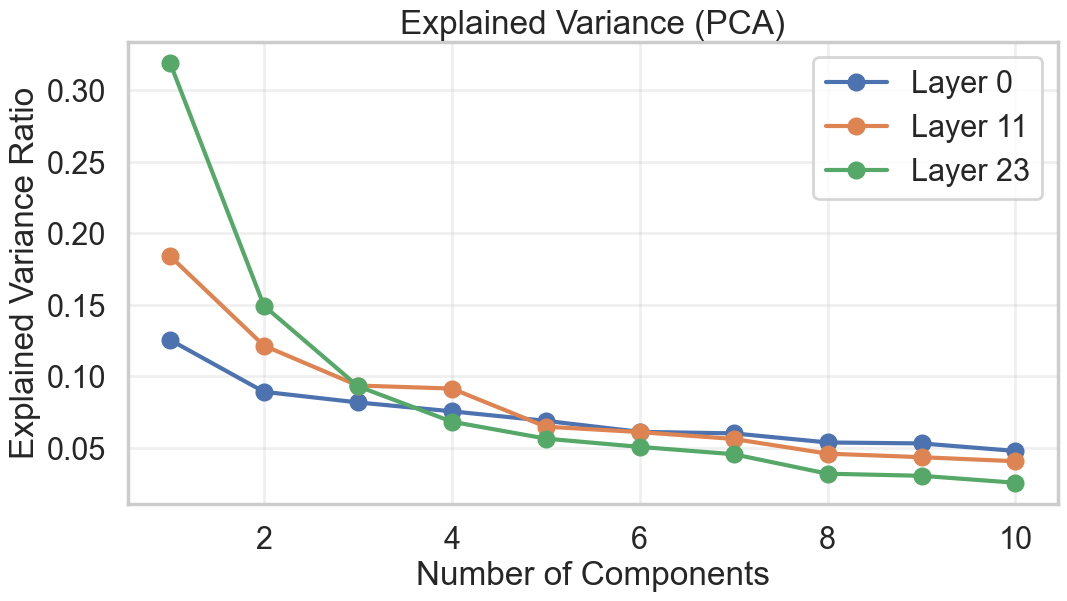

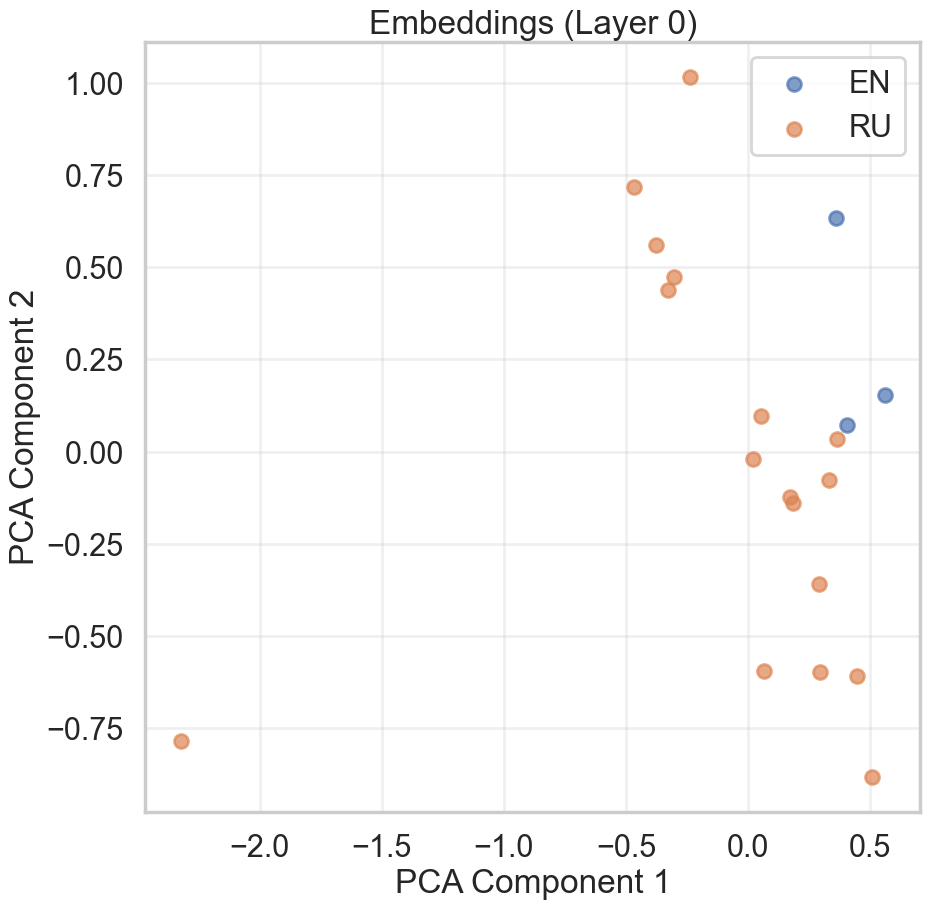

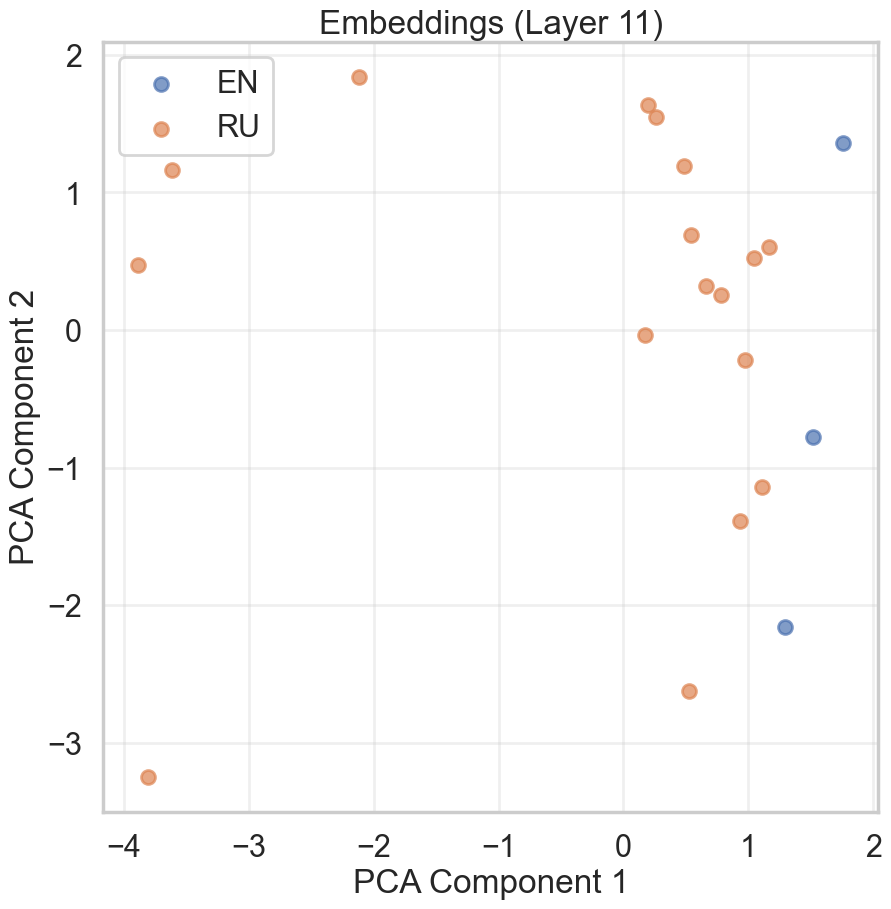

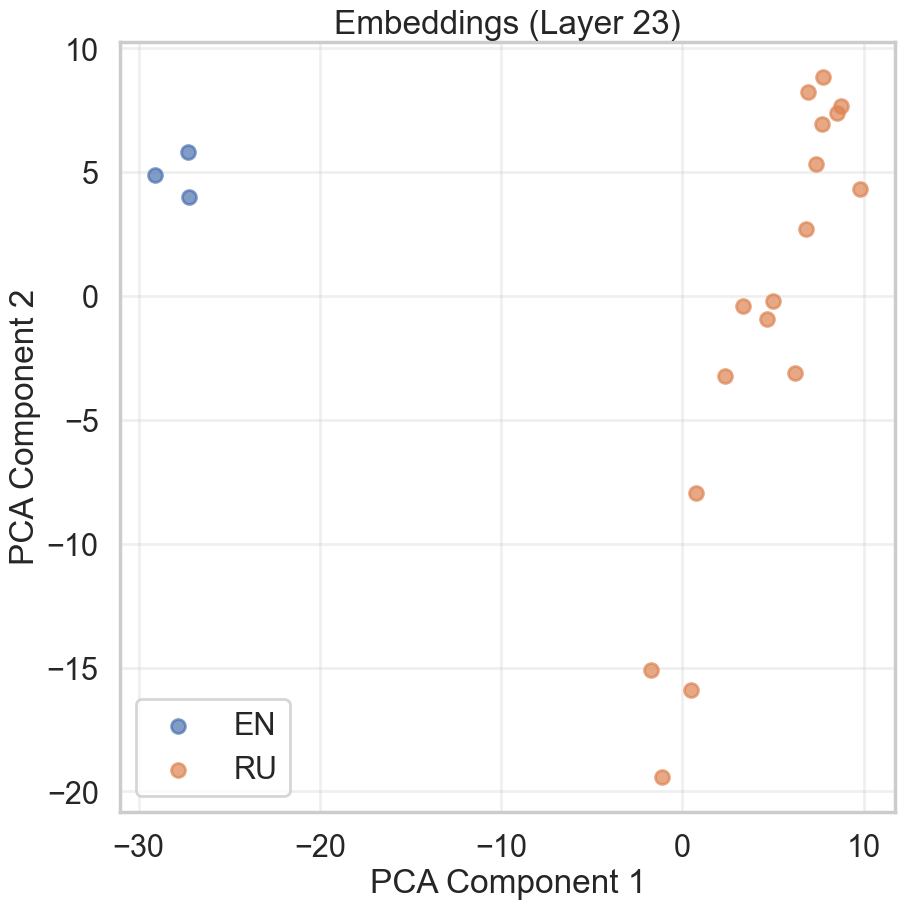

{'EN': [array([[ 0.5609187 ,  0.36009785,  0.40329028],
         [ 0.15351765,  0.63255572,  0.07108399],
         [-0.25622627, -1.02042712, -0.95978454],
         [ 0.30768977,  0.94403746,  0.10631177],
         [ 0.01634148,  0.08544896,  0.22095256],
         [-0.02952151, -0.01750966, -0.04830121],
         [-0.18541702, -0.47798147,  0.72176263],
         [ 0.39470475,  0.69679329, -1.1157728 ],
         [ 1.05033316, -0.82134575, -0.06832428],
         [ 0.04190906,  0.11225954,  0.30356471]]),
  array([[-0.3263524 ,  0.55066465, -0.44367252],
         [ 0.77747312,  2.05948125,  0.90910251],
         [ 0.03371329,  0.67285847,  0.25562212],
         [-0.18267338, -1.55870754,  0.27069698],
         [-1.66541772,  0.60077241,  0.51715661],
         [ 1.15340277, -0.7876074 ,  1.03359262],
         [-0.2812396 , -0.26464731,  1.3604113 ],
         [ 1.24692984,  0.13713276, -0.97877729],
         [-0.37061384,  0.28508597, -0.78488721],
         [-0.05436997, -0.04458312, -0.010

In [3]:
from lexical_reflections.gather_data.activation_cache import collect_activation_cache
from lexical_reflections.pca.analyze import find_lexical_subspace_intersection

cache = collect_activation_cache(model, toy_data)
find_lexical_subspace_intersection(model, cache)

In [4]:
from datasets import load_dataset

data_opus_books = load_dataset("Helsinki-NLP/opus_books", "en-ru")["train"].to_pandas()["translation"]

In [5]:
subset_opus_books = data_opus_books[:50]

Data len:  50


100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


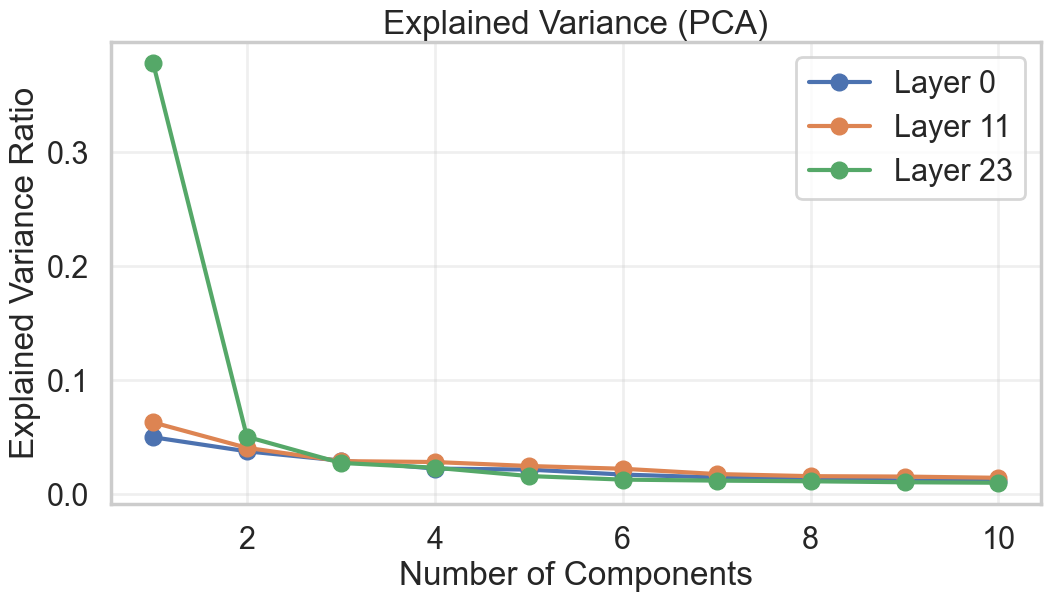

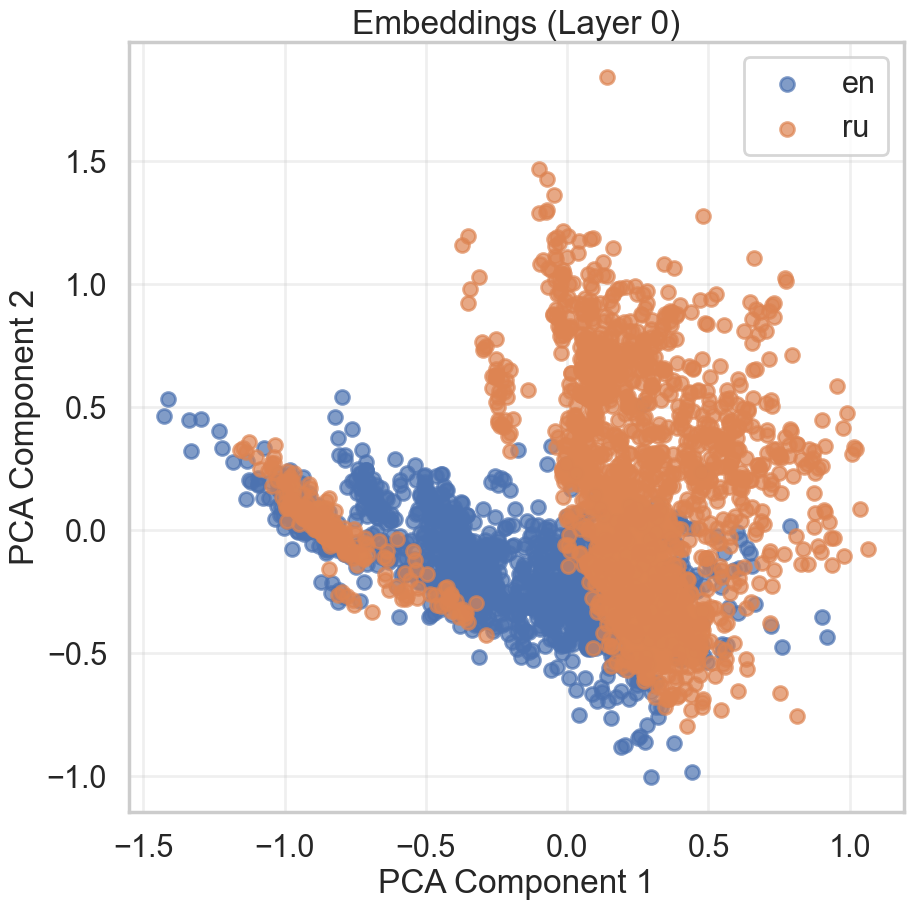

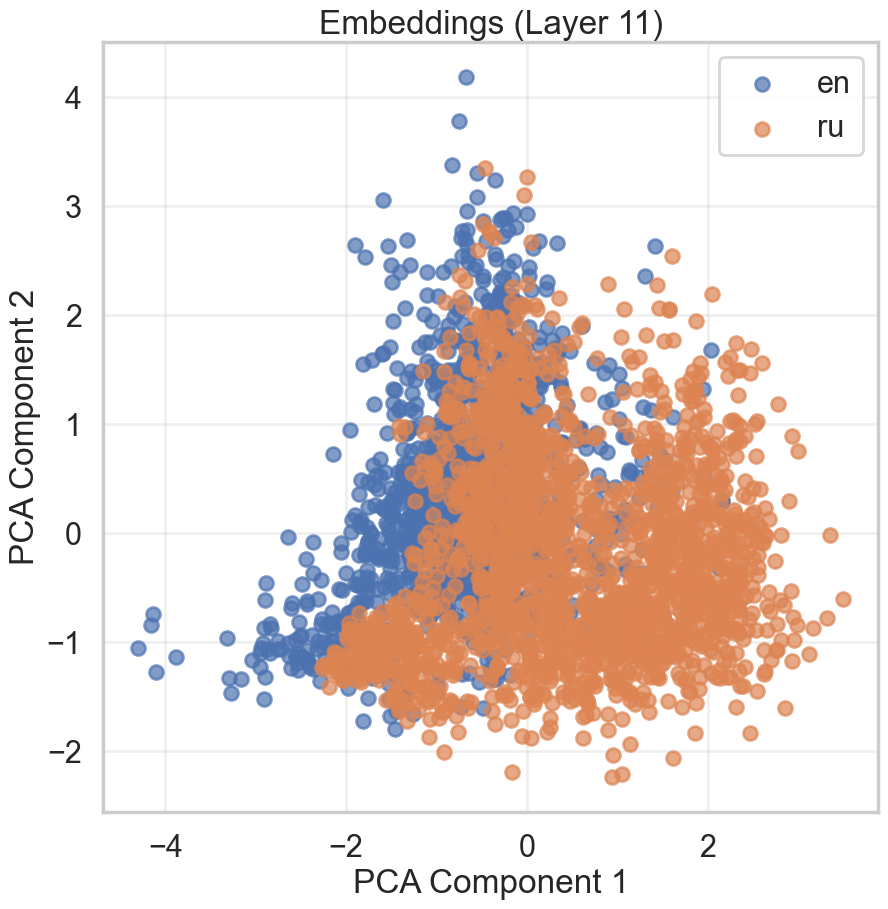

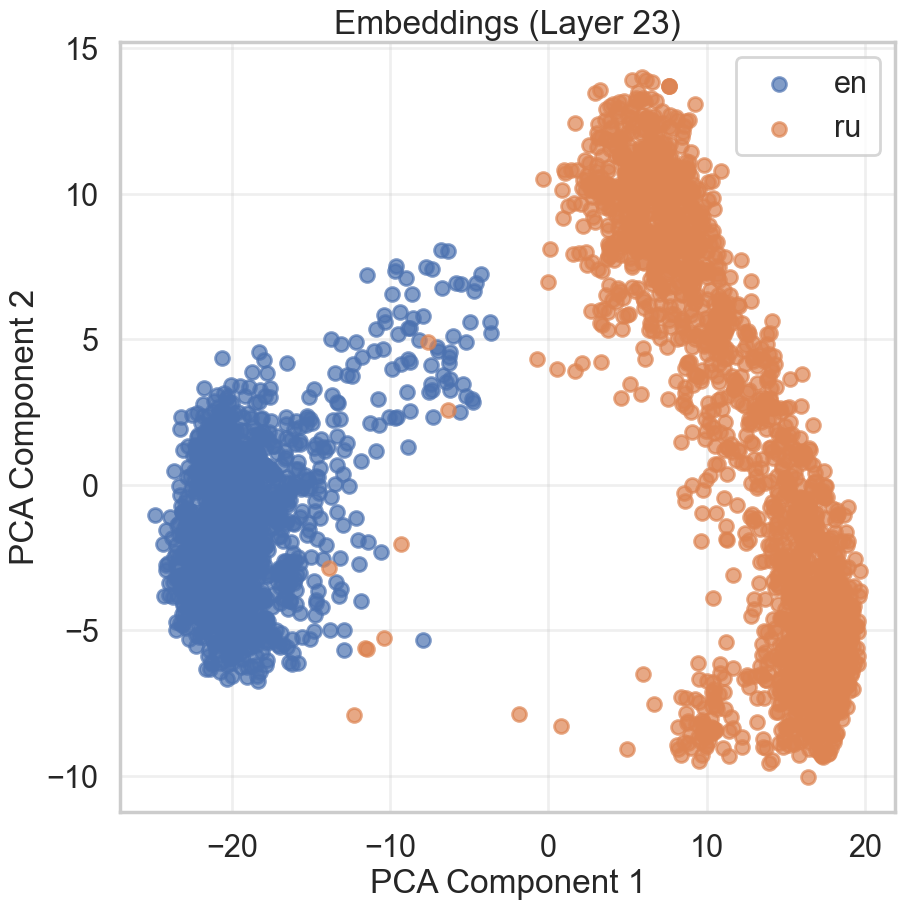

In [6]:
cache = collect_activation_cache(model, subset_opus_books)
projections = find_lexical_subspace_intersection(model, cache)